# Problem 1:

### Question 1:

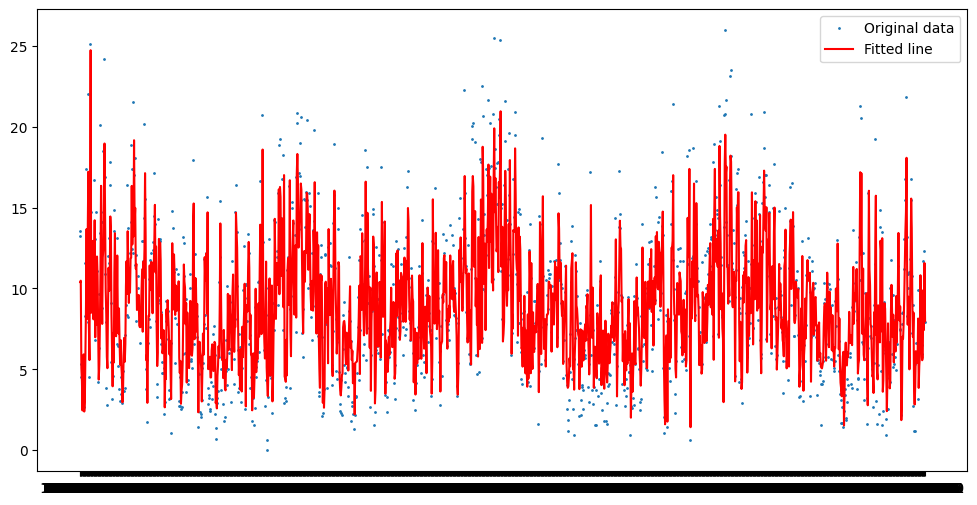

thetas are: [ 0.74657977  0.13324713  0.293872   -0.30924845]
loss is [19402.93737496]


"\nmodel_coeff = [ 0.74657977  0.13324713  0.293872   -0.30924845] which would resolve to be the theta's attached to the following features:\nprevious day Wind = 0.74657977\nprevious day Rain = 0.13324713\nprevious day MaxTemp = 0.293872\nprevious day MinTemp = -0.30924845\n\nThe interpretation of these values for theta should be that when all other values are left the same, a unit change in one feature would\nresult in a change in the wind speed of that value of theta.\n\nan example would be that if the previous days MinTemp was 1 higher, the wind value would be predicted 0.3092 lower\n"

In [2]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

loss_dic ={}
coeff_dic = {}
#import necessary data
data_train = pd.read_csv('wind_train.csv')
data_test = pd.read_csv('wind_test.csv')

##### conduct data extraction to develop i-1 values for the regression
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp']
y_col = 'Wind'

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()

# Create y the known value for windspeed
y = data_train[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


#####1.a#####

model = np.linalg.lstsq(X, y, rcond=None)
model_coeff = model[0]
error_val = model[1]
y_pred = X @ model_coeff
X_for_pred = data_train[1:]


#####1.b#####

plt.figure(figsize=(12, 6))
plt.plot(data_train['Date'], data_train['Wind'], 'o', label='Original data', markersize=1)
plt.plot(X_for_pred['Date'], y_pred , 'r', label='Fitted line')
plt.legend()
plt.show()

#####1.c#####

print(f'thetas are: {model[0]}')
print(f'loss is {model[1]}')
loss_dic['model1'] = model[1]
coeff_dic['model1'] = model[0]
"""
model_coeff = [ 0.74657977  0.13324713  0.293872   -0.30924845] which would resolve to be the theta's attached to the following features:
previous day Wind = 0.74657977
previous day Rain = 0.13324713
previous day MaxTemp = 0.293872
previous day MinTemp = -0.30924845

The interpretation of these values for theta should be that when all other values are left the same, a unit change in one feature would
result in a change in the wind speed of that value of theta.

an example would be that if the previous days MinTemp was 1 higher, the wind value would be predicted 0.3092 lower
"""


### Question 2

Model 2:  Model 2 is not invertable.  Based on this the PLS formula is not valid.  The 5 X 1460 matrix has a rank of 4.  due to the nature that the MinTemp, MaxTemp and TempDiff are not linearly independent the rank is lower than the number of features.  For this reason it is not invertable.

Model 3: with the removal of MaxTemp, the rank of the matrix X in this case remains 4.  With the feature vector being 4 x 1460 the matrix is invertable and therefore the OLS formula can be applied.

In [3]:
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp', 'TempDiff']
y_col = 'Wind'

#create new value for differential temperature
x_new = data_train['MaxTemp']-data_train['MinTemp']
data_train['TempDiff'] = x_new

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()
del data_shifted['MaxTemp_prev_day']
# Create y the known value for windspeed
y = data_train[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()




model = np.linalg.lstsq(X, y, rcond=None)
model_coeff = model[0]
error_val = model[1]
y_pred = X @ model_coeff
X_for_pred = data_train[1:]
print(f'thetas are: {model[0]}')
print(f'loss is {model[1]}')
loss_dic['model3'] = model[1]
coeff_dic['model3'] = model[0]

thetas are: [ 0.74657977  0.13324713 -0.01537645  0.293872  ]
loss is [19402.93737496]


Mark 4: with the introduction of nonlinearity through the squareroot of the differential temperature the rank of this matrix is now 5.  That included with the features matrix being 5 x 1460 shows that this matrix is invertable.

In [5]:
X_cols = ['Wind', 'Rain', 'MaxTemp', 'MinTemp', 'TempDiff']
y_col = 'Wind'

#create new value for differential temperature
x_new = data_train['MaxTemp']-data_train['MinTemp']
x_new_sqrt = x_new.apply(np.sqrt)
data_train['TempDiff'] = x_new_sqrt

# Shift feature columns by one day
data_shifted = data_train[X_cols].shift(1)
data_shifted.columns = [col + '_prev_day' for col in data_shifted.columns]

data_shifted = data_shifted.dropna()

# Create y the known value for windspeed
y = data_train[y_col].iloc[1:]

# Create X independent variable with  
X = data_shifted

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()


model = np.linalg.lstsq(X, y, rcond=None)
model_coeff = model[0]
error_val = model[1]
y_pred = X @ model_coeff
X_for_pred = data_train[1:]
print(f'thetas are: {model[0]}')
print(f'loss is {model[1]}')
loss_dic['model4'] = model[1]
coeff_dic['model4'] = model[0]

thetas are: [ 0.62421199  0.11642997 -0.50445607  0.3770674   2.95437974]
loss is [18449.62816537]


In [13]:
df_loss = pd.DataFrame.from_dict(loss_dic)
print(coeff_dic) 

{'model1': array([ 0.74657977,  0.13324713,  0.293872  , -0.30924845]), 'model3': array([ 0.74657977,  0.13324713, -0.01537645,  0.293872  ]), 'model4': array([ 0.62421199,  0.11642997, -0.50445607,  0.3770674 ,  2.95437974])}


In [12]:
print(df_loss) 

         model1        model3        model4
0  19402.937375  19402.937375  18449.628165
